<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/videogames_market_research/videogames_market_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение потенциально популярной игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Задачей проекта является поиск ответов на следующие вопросы:**
1. Сколько игр выпускалось в разные годы?
2. Как менялись продажи по платформам?
3. За какой характерный срок появляются новые и исчезают старые платформы? 
4. Какие платформы лидируют по продажам, растут или падают?
5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**План работы:**
1. Шаг 1. Открыть файлы с данными и изучить общую информацию
2. Шаг 2. Осуществить предобработку данных (заменить названия столбцов, обработать пропуски, заменить типы данных)
3. Шаг 3. Ответить на вопросы, поставленные в задачах
4. Шаг 4. Сформулировать общий вывод

**Описание данных:**

* Name — *название игры*
* Platform — *платформа*
* Year_of_Release — *год выпуска*
* Genre — *жанр игры*
* NA_sales — *продажи в Северной Америке (миллионы проданных копий)*
* EU_sales — *продажи в Европе (миллионы проданных копий)*
* JP_sales — *продажи в Японии (миллионы проданных копий)*
* Other_sales — *продажи в других странах (миллионы проданных копий)*
* Critic_Score — *оценка критиков (максимум 100)*
* User_Score — *оценка пользователей (максимум 10)*
* Rating — *рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.*

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import pylab

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/games.csv')

### Приведение заголовков к нижнему реестру

In [ ]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15167,SimCity Societies,PC,2007.000,Simulation,0.000,0.020,0.000,0.000,63.000,4.3,E10+
11883,Hearts of Iron III,PC,2009.000,Strategy,0.020,0.040,0.000,0.010,77.000,7.1,E10+
13080,Legend of Kay,WiiU,2015.000,Action,0.030,0.020,0.000,0.000,nan,NaN,NaN
2470,Sniper Elite V2,X360,2012.000,Shooter,0.460,0.280,0.020,0.070,67.000,6.8,M
7657,Taiko no Tatsujin: Go! Go! Godaime,PS2,2004.000,Misc,0.000,0.000,0.200,0.000,nan,NaN,NaN
15339,Sugoi Hebereke,SNES,1994.000,Fighting,0.000,0.000,0.020,0.000,nan,NaN,NaN
11003,Monopoly Collection,Wii,2011.000,Misc,0.020,0.070,0.000,0.010,nan,tbd,E
9618,Jurassic: The Hunted,X360,2009.000,Shooter,0.120,0.000,0.000,0.010,60.000,7.2,T
539,Mortal Kombat X,PS4,2015.000,Fighting,1.500,0.800,0.000,0.480,83.000,7.7,M
6833,Just Dance Kids 2,PS3,2011.000,Misc,0.100,0.100,0.000,0.040,nan,tbd,E


Видим первую проблему: некрасивая запись названия столбцов, неканоничная. Приведем все в нижний реестр!

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN


Успех - теперь у нас красивые названия переменных! Продолжим дальше изучать данные.

In [ ]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Метод describe() по какой-то причине выводит лишь часть переменных. Видимо не все из них являются численными, что противоречит их описанию. Например,  user_score имеет тип данных object, хотя очевидно, что это численная переменная. Нужно будет привести данные к нужному типу. 

Но предварительно избавимся от пропусков в данных.

### Удаление пропусков в данных

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.01
platform,0
year_of_release,1.61
genre,0.01
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.32
user_score,40.09


Пропущенные значения наблюдаются в переменных:
1. critic_score - 51.32%
2. rating - 40.48%
3. user_score - 40.09%
4. year_of_release - 1.61%
5. genre - 0.01%
6. name - 0.01%

Попробуем разобраться, что будем с ними делать!

Начнем с переменной name.

In [ ]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,nan,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,nan,NaN,NaN


Пропущенные значения - это всего лишь 2 наблюдения.

**Плохая новость** - у нас нет косвенных данных, по которым можно было бы догадаться о значении пропущенных значений, **хорошая новость** - именно в этих наблюдениях также находятся пропущенные значения по переменной genre. Поэтому удалим 2 эти строчки.

Отряд не заметил потери бойца (всего-то два наблюдения!), зато убьем двух зайцев - избавимся от пропусков сразу в двух переменных.

In [ ]:
df.drop(df[df['name'].isnull()].index,inplace=True)

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,1.61
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.31
user_score,40.08


Получилось! В переменных name и genre больше нет пропущенных значений!

Теперь пойдем изучать переменную year_of_release.

In [ ]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.570,1.020,0.000,0.410,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.360,0.140,0.000,0.030,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16448,Inversion,PC,nan,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.010,0.000,0.000,0.000,nan,NaN,NaN


На данном этапе видится 2 варианта работы с пропущенными значениями по данной переменной (year_of_release):
1. Удалить данные, так как они составляют менее 2% от выборки;
2. Попытаться предсказать год выпуска по косвенным данным. В нашем случае это могут быть данные по переменной platform, так как у каждой приставки есть срок жизни, и с высокой вероятностью игра была выпущена в его пределах.

In [ ]:
df['year_of_release'].describe()

count   16444.000
mean     2006.486
std         5.876
min      1980.000
25%      2003.000
50%      2007.000
75%      2010.000
max      2016.000
Name: year_of_release, dtype: float64

Запомним наши квартили с процентилями.

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna((df['platform'].map(df.groupby(
'platform')['year_of_release'].median().to_dict())))

In [ ]:
df['year_of_release'].describe()

count   16713.000
mean     2006.475
std         5.896
min      1980.000
25%      2003.000
50%      2007.000
75%      2010.000
max      2016.000
Name: year_of_release, dtype: float64

Само распределение вроде бы не сломали (квартили да процентили остались теми же).

А теперь по косвенным признакам посмотрим, насколько хорошо здесь применять этот метод.

In [ ]:
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2005.000,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
1881,Madden NFL 2004,XB,2003.000,Sports,1.020,0.020,0.000,0.050,92.000,8.3,E
3889,Madden NFL 2004,GC,2003.000,Sports,0.400,0.100,0.000,0.010,94.000,7.7,E
5708,Madden NFL 2004,GBA,2003.000,Sports,0.220,0.080,0.000,0.010,70.000,6.6,E


In [ ]:
df[df['name'] == 'PDC World Championship Darts 2008']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.000,Sports,0.020,0.210,0.000,0.010,51.000,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.000,Sports,0.010,0.000,0.000,0.000,nan,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,2009.000,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+


Делаем тривиальное предположение, что "Madden NFL 2004" вышла в 2004 году.

[Википедия](https://ru.wikipedia.org/wiki/Madden_NFL_2004) дает знать, что игра вышла 12 августа 2003, что логично, так как спортивные симуляторы выходят чаще всего к началу очередного года, чтобы уже 1 января 2021 можно было играть в FIFA 2021.

Пропуск по игре был для платформы PS2. Промазали на 2 года. Такая ошибка может быть предположительно связана с тем, что у популярной приставки от Sony был более долгий срок жизни, из-за чего предсказанное значение сместилось вверх (на целых 2 года).

Второй эксперимент: PDC World Championship Darts 2008 для PSP. Промахнулись всего на 1 год. 

Несмотря на небольшую неточность, считаю такую замену более успешным решением, чем просто удаление данных.

Посмотрим, что у нас в целом с пропусками!

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.31
user_score,40.08


Становится все лучше и лучше!

Теперь разберемся вот с этим моментом:

*Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать*

In [ ]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [ ]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.5       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [ ]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Самое частотное значение переменной user_score это tbd, что расшифровывается как To be determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным. В нашем случае это скорее отсутствие оценки на момент занесения игры в таблицу.

Подробнее можно почитать в [статье](https://autogear.ru/article/171/345/tbd---chto-znachit-eto-sokraschenie/).

Такое значение не получится заменить на какое-то адекватное на основании косвенных данных. По сути, в этой базе данных это игры, оставшиеся без оценки. При этом само наличие строчного значения в переменной препятствует манипуляциям с ней. Заменим эти значения на пропущенные (np.nan)!

Похожая ситуация наблюдается и для переменной rating. Значение RP - «Rating Pending» или на нашем православном «Рейтинг ожидается». Следовательно на момент формирования БД это отсутствующее значение. Предлагается от него избавиться!

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [ ]:
df = df.drop(df[df['rating'] == 'RP'].index)

Для той же цели: облегчения манипуляций с числовыми переменными заменим пропуски невозможными (по смыслу) числовыми значениями. Предлагаем -1, так как отрицательного рейтинга у игр не существует, хотя некотрые из них этого заслуживают! Привет Warcraft III: Reforged.&#129326;

В переменной rating есть пропущенные значения, так как скорее всего просто для игры не был определен рейтинг. Или, например, часть игр вышла до 1994 года, когда организации Entertainment Software Rating Board еще не существовало, поэтому игры просто не могли получить соответствующий рейтинг. Таким образом, предлагается заменить пустые значения на значение 'Not specified'.

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('Not specified')

Посмотрим, что получилось у нас с нашими пропусками в результате всех манипуляций!

In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


Все красивенько, пропущенных значений больше нет! Идем дальше!

### Замена типов данных

Посмотрим, сколько памяти расходуется в настоящий момент с нашими типами данных.

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16710 non-null float64
genre              16710 non-null object
na_sales           16710 non-null float64
eu_sales           16710 non-null float64
jp_sales           16710 non-null float64
other_sales        16710 non-null float64
critic_score       16710 non-null float64
user_score         16710 non-null object
rating             16710 non-null object
dtypes: float64(6), object(5)
memory usage: 5.9 MB


In [ ]:
df['user_score'] = df['user_score'].astype('float16')
df['year_of_release'] = df['year_of_release'].astype('int16')
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')
df['critic_score'] = df['critic_score'].astype('int8')
df['user_score'] = df['user_score'].astype('int8')
df['rating'] = df['rating'].astype('category')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16710 non-null int16
genre              16710 non-null object
na_sales           16710 non-null float32
eu_sales           16710 non-null float32
jp_sales           16710 non-null float32
other_sales        16710 non-null float32
critic_score       16710 non-null int8
user_score         16710 non-null int8
rating             16710 non-null category
dtypes: category(1), float32(4), int16(1), int8(2), object(3)
memory usage: 3.7 MB


Опустили количество используемой памяти с 5.1 MB до 3.2 MB. На самом деле можно было бы и лучше (до 1.5 MB), если не комментировать замену типов данных (на category) для переменных platform и genre, но тут личное - не люблю, как ведут себя переменные с этим типом данных, а именно продолжают отображать ключи даже при отсутствии значений. Поэтому оставим вот так

### Суммарные продажи во всех регионах

Необходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. Пускай этим столбцом будет total_sales!

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16710.000,16710.000,16710.000,16710.000,16710.000
mean,0.263,0.145,0.078,0.047,0.533
std,0.814,0.503,0.309,0.187,1.548
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.060
50%,0.080,0.020,0.000,0.010,0.170
75%,0.240,0.110,0.040,0.030,0.470
max,41.360,28.960,10.220,10.570,82.540


Кажется, что все адекватно посчитано. 

## Исследовательский анализ данных

### Количество игр по годам

Необходимо посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

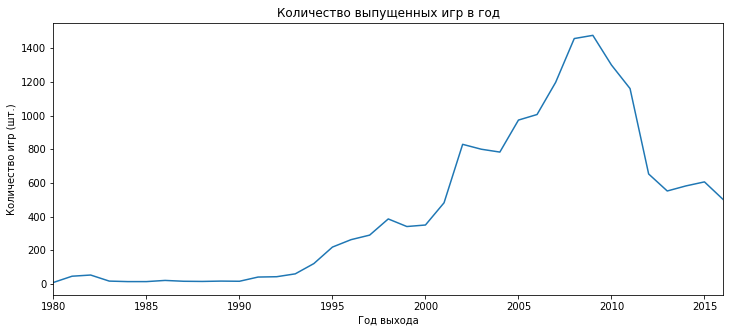

In [ ]:
df.groupby('year_of_release')['name'].count()\
  .plot(figsize=(12,5))
plt.title('Количество выпущенных игр в год')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр (шт.)')
plt.show()

In [ ]:
df.groupby('year_of_release')\
  .agg({'name':['count']})\
  .style.format("{:.2f}")

,name
,count
year_of_release,
1980,9.00
1981,46.00
1982,53.00
1983,17.00
1984,14.00
1985,14.00
1986,21.00
1987,16.00


Как видно из графика и таблицы, число игр до 1995 года на порядок ниже, чем в последующие годы. Сравнивать данные по годам при столь разном количестве наблюдений было бы некорректно, поэтому на данном этапе предлагается избавиться от данных за 1995 год и ранее. А дальше посмотрим!

In [ ]:
df = df[df['year_of_release'] > 1995]

### Срок жизни платформ

Необходимо также посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

**ТОП-10** платформ по продажам выглядит следующим образом:

In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2    1255.770
X360    971.420
PS3     939.650
Wii     907.510
DS      806.100
PS      688.870
GBA     317.850
PS4     314.140
PSP     294.050
3DS     259.000
Name: total_sales, dtype: float32

**ТОП-10** получается слишком неоднородным: у 6 позиции (DS) суммарные продажи на 656.980 млн копий, а у 7 (PS4) уже в 2 раза меньше - 314 млн копий.

Поэтому разумнее будет взять рейтинг **ТОП-6**.

Сохраним **ТОП-6** значений в списке!

In [ ]:
games_top_6 = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index.to_list()

In [ ]:
games_top_6

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [ ]:
df_games_top_6 = df.query('platform in @games_top_6').groupby('platform')['year_of_release'].agg({'platform': ['min', 'max']})
df_games_top_6.columns = df_games_top_6.columns.droplevel(0)
df_games_top_6['range'] = df_games_top_6['max'] - df_games_top_6['min']

In [ ]:
df_games_top_6.sort_values('range', ascending=False)

,min,max,range
platform,,,
PS2,2000,2011,11
X360,2005,2016,11
PS3,2006,2016,10
Wii,2006,2016,10
DS,2004,2013,9
PS,1996,2003,7


In [ ]:
df_games_top_6['range'].mean()

9.666666666666666

Видно, что на таких популярных приставках, как PS2, PSP, X360 игры продолжали выходить на протяжении 11 лет. На других приставках чуть меньше. У PS4 по данным всего три года, но это лишь по той причине, что она не так давно вышла (на момент формирования БД).

Среднее количество лет существования приставки: 9.5 лет. Округлим до 10 лет.

**Актуальный период, таким образом, выберем следующим образом:**

1. Определим самые популярные платформы за 2016 год;
2. Посмотрим, в каком году вышли данные платформы
3. Этот год возьмем за начало интервала

### Потенциально прибыльные платформы

Необходимо определить, какие платформы лидируют по продажам, растут или падают? Нужно выбрать несколько потенциально прибыльных платформ.

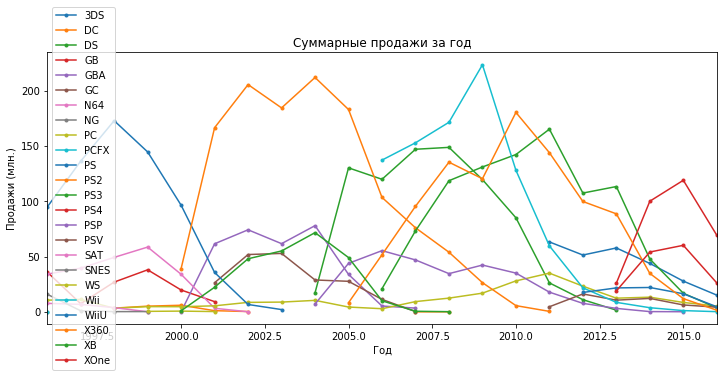

In [ ]:
pd.pivot_table(df, values='total_sales',
               index='year_of_release',
               columns=['platform'],
               aggfunc=np.sum).plot(figsize=(12,5),style='.-')
plt.title('Суммарные продажи за год')
plt.xlabel('Год')
plt.ylabel('Продажи (млн.)')
plt.legend (loc='center left')

plt.show()

Лидером продаж на 2016 год является PS4, следом идут XOne и 3DS. И на 4 месте PC. 

Также может показаться словно с 2015 года количество продаж по всем платформам начинает снижаться, из чего можно сделать вывод, что рынок игр в целом начинает просидать. Однако вероятнее всего то, что за 2016 год просто данные представлены предоставлены не в полном объеме, о чем есть предупреждение в описании проекта:

"*Данные за 2016 год могут быть неполными*"

PS4, XOne, 3DS - лидеры актуального периода. Не так давно появились (на момент формирования БД) и когда-то уйдут на покой с выходом нового поколения. Наиболее стабильная из лидеров в плане продаж платформа - PC. 

In [ ]:
df.query('platform == "PS4" or platform == "XOne" or platform == "3DS"').groupby('platform')['year_of_release'].agg({'platform': ['min', 'max']})

platform      
              min   max
platform               
3DS          2011  2016
PS4          2013  2016
XOne         2013  2016

Встает выбор, что взять 2011 или 2013? Наверное лучше выбрать 2013, потому что на момент 2011 года еще продолжают доминировать консоли старого поколения (PS3 и XBox360), тогда как с 2013 года они начинают резко терять популярность и уступать место новому поколению. Думаю, остановимся на том, что **актуальный период: 2013-2016 годы**.

In [ ]:
df = df[df['year_of_release'] > 2013]

### Глобальные продажи игр в разбивке по платформам

Необходимо построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

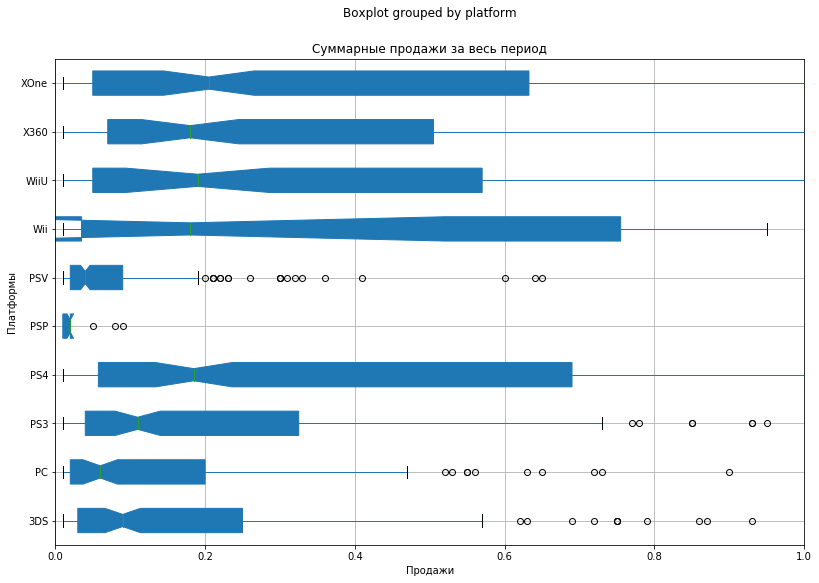

In [ ]:
df.boxplot(by='platform',column='total_sales', figsize=(13,9), notch=True, sym="o",vert=False, widths = 0.5, patch_artist = True)
plt.title('Суммарные продажи за весь период')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.xlim((0,1))
plt.show()

In [ ]:
df.groupby('platform')['total_sales'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.000,0.766,1.615,0.010,0.057,0.185,0.690,14.630
XOne,228.000,0.616,1.047,0.010,0.050,0.205,0.633,7.390
WiiU,73.000,0.589,1.161,0.010,0.050,0.190,0.570,7.090
Wii,11.000,0.461,0.625,0.010,0.035,0.180,0.755,2.010
X360,111.000,0.434,0.629,0.010,0.070,0.180,0.505,4.280
3DS,212.000,0.409,1.188,0.010,0.030,0.090,0.250,11.680
PS3,219.000,0.311,0.633,0.010,0.040,0.110,0.325,5.270
PC,151.000,0.179,0.329,0.010,0.020,0.060,0.200,3.050
PSV,296.000,0.077,0.142,0.010,0.020,0.040,0.090,1.960


In [ ]:
df.groupby('platform')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,228.000,0.616,1.047,0.010,0.050,0.205,0.633,7.390
WiiU,73.000,0.589,1.161,0.010,0.050,0.190,0.570,7.090
PS4,376.000,0.766,1.615,0.010,0.057,0.185,0.690,14.630
Wii,11.000,0.461,0.625,0.010,0.035,0.180,0.755,2.010
X360,111.000,0.434,0.629,0.010,0.070,0.180,0.505,4.280
PS3,219.000,0.311,0.633,0.010,0.040,0.110,0.325,5.270
3DS,212.000,0.409,1.188,0.010,0.030,0.090,0.250,11.680
PC,151.000,0.179,0.329,0.010,0.020,0.060,0.200,3.050
PSV,296.000,0.077,0.142,0.010,0.020,0.040,0.090,1.960


Медиана по топовым платформам варьируется от 0.020 (PSP) до 0.205 (XOne) млн проданных копий.

Наибольшее среднее значение по количеству проданных копий на платформах у **PS4 и XOne**, что в очередной раз подтверждает наши выводы относительно того, что эти платформы **самые успешные в рассматриваемый период**.

### Влияние отзывов пользователей и критиков на продажи внутри одной платформы

Необходимо посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

Как мы выяснили, к самым топовым платформам рассматриваемого периода у нас относятся PS4 и XOne. Предлагаю выбрать одну из них. Как сонибой выберу PS4.

In [ ]:
df_ps4 = df.query('platform == "PS4" and critic_score != "-1" and user_score != "-1"')

In [ ]:
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.4019028771227368

**Наблюдается сильная положительаня связь между оценкой критиков и количеством продаж игр** (коэффициент корреляции Пирсона: 0.4019028771227368). Посмотрим на нее глазами!

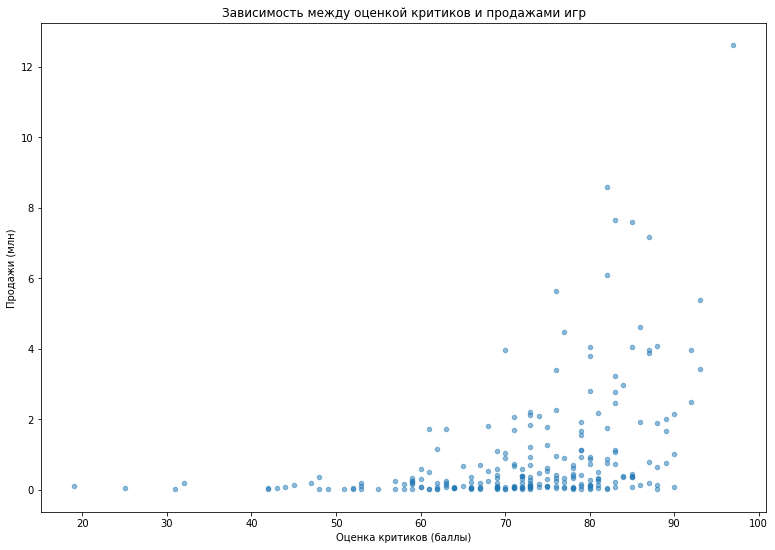

In [ ]:
df_ps4.plot(x='critic_score',
            y='total_sales',
            kind='scatter',
            alpha=0.5,
            figsize=(13,9));
plt.title('Зависимость между оценкой критиков и продажами игр')
plt.xlabel('Оценка критиков (баллы)')
plt.ylabel('Продажи (млн)')
plt.show()

Видно, что игры с более высокой оценкой критиков лучше продаются. Что точно:

- **современном мире агенты влияния и разного рода тренд-сеттеры (критики, блогеры, издания, стримеры и далее до бесконечности) оказывают существенное влияние на популярность контента, на лояльность к нему. Ознакомление с оценкой "специалиста" или "эксперта" является стандартной процедурой перед принятием решения о покупке продукта. Это особенно актуально еще и потому, что игровые-критики чаще всего получают доступ к игре намного раньше остальных пользователей, из-за чего продолжительное время есть возможность опереться только на их мнение. Поэтому для обеспечения хороших продаж девелоперам обязательно нужно ориентироваться на оценки критиков**

Но интересно, что влияет больше: оценка критиков или пользователей? Сейчас высним!

In [ ]:
df_ps4['user_score'].corr(df_ps4['total_sales'])

-0.03084430551378796

**Не наблюдается связи между оценкой пользователей и количеством продаж игр** (коэффициент корреляции Пирсона: -0.03084430551378796). Тоже посмотрим на это!

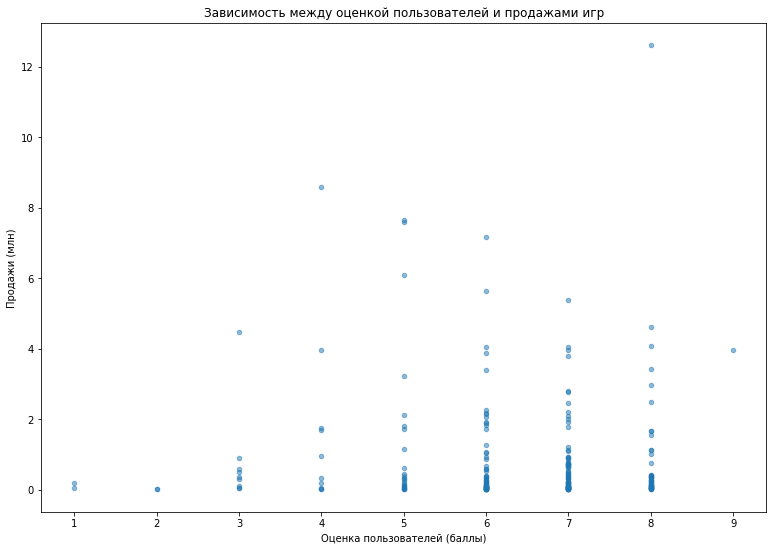

In [ ]:
df_ps4.plot(x='user_score',
            y='total_sales',
            kind='scatter',
            alpha=0.5,
            figsize=(13,9));
plt.title('Зависимость между оценкой пользователей и продажами игр')
plt.xlabel('Оценка пользователей (баллы)')
plt.ylabel('Продажи (млн)')
plt.show()

Корреляция отсутствует, что может быть объяснено следующим:

- в значительной мере успех игры определяется продажами на релизе
- на релизе пользователи чаще всего принимают решение о покупке исходя из собственных ожиданий, на основе впечатлений от трейлеров, рекламной кампании и маркетинговой стратегии в целом, от оценок критиков (о чем говорили чуть выше) и т.д.
- после покупки игрок уже сам ставит оценку игре, и иногда она может быть не самой высокой, но высокие продажи уже есть.
- далеко за примерами ходить не нужно - Cyberpunk 2077: Оценки пользователей на сайте Metacritic спустя день после выхода игры: для PC — 6,2 из 10, для PS4 — 2,0 из 10, для Xbox One — 2,5 из 10. Подробнее можно почитать [тут](https://www.igromania.ru/news/100703/Igroki_zanizhayut_reyting_Cyberpunk_2077_na_Metacritic.html). При этом Cyberpunk 2077 стал самым крупным в истории видеоигр с точки зрения цифровых доходов и проданных цифровых лицензий — более 10,2 миллионов на всех платформах. Подробнее можно почитать [тут](https://www.overclockers.ua/news/games/2021-01-23/128459/#:~:text=Cyberpunk%202077%20%E2%80%94%20%D1%81%D0%B0%D0%BC%D0%B0%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B2%D0%B0%D0%B5%D0%BC%D0%B0%D1%8F%20%D0%B8%D0%B3%D1%80%D0%B0%20%D0%BF%D0%BE%20%D1%87%D0%B8%D1%81%D0%BB%D1%83%20%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D1%8B%D1%85%20%D0%BA%D0%BE%D0%BF%D0%B8%D0%B9%20%D0%BD%D0%B0%20%D0%BC%D0%BE%D0%BC%D0%B5%D0%BD%D1%82%20%D1%80%D0%B5%D0%BB%D0%B8%D0%B7%D0%B0,-23.01.2021%20%7C%2008&text=%D0%9A%D0%B0%D0%BA%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D1%8B%D0%B2%D0%B0%D0%B5%D1%82%20%D0%BE%D1%82%D1%87%D0%B5%D1%82%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8,2%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D0%BD%D0%B0%20%D0%B2%D1%81%D0%B5%D1%85%20%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%85.).
- но это лишь яркий пример, а есть тренд, состоящий в том, что иногда кассу делают не хорошие игроделы, а хорошие маркетологи (и ничего плохого в этом нет, если что).

### Влияние отзывов пользователей и критиков на продажи внутри других платформ

Теперь попробуем соотнести эти выводы с продажами игр на других платформах.

Возьмем топ платформ, что у нас есть без отрицательных значений в переменных с оценками критиков и пользователей (critic_score, and user_score)!

In [ ]:
df_notnun_score = df.query('critic_score != "-1" and user_score != "-1"')

In [ ]:
top_positive = df_notnun_score['platform'].value_counts().index.to_list()

Вручную сметреть корреляции для каждой платформы было бы очень тягомотно, поэтому напишем функции, которые будет смотреть корреляции по любому датафрейму и списку платформ, а главное оставлять всю эту инфу в удобных табличках!

In [ ]:
def corr_critic(df, platform):
    platforms = []
    corr_critic_data = []
    names = ['Влияние оценки критиков на продажи']
    
    for i in platform:
        critic = df[df['platform'] == i]['critic_score'].corr(df[df['platform'] == i]['total_sales'])
        corr_critic_data.append(critic)
        platforms.append(i)
        df_corr_critic = pd.DataFrame(corr_critic_data, platforms, names)
        
    return df_corr_critic

In [ ]:
def corr_user(df, platform):
    platforms = []
    corr_user_data = []
    names = ['Влияние оценки пользователей на продажи']
    
    for i in platform:
        user = df[df['platform'] == i]['user_score'].corr(df[df['platform'] == i]['total_sales'])
        corr_user_data.append(user)
        platforms.append(i)
        df_corr_user = pd.DataFrame(corr_user_data, platforms, names)
        
    return df_corr_user

In [ ]:
corr_critic = corr_critic(df_notnun_score,top_positive)
corr_user = corr_user(df_notnun_score,top_positive)
corr_total = corr_critic.join(corr_user)

In [ ]:
corr_total.sort_values('Влияние оценки критиков на продажи',ascending=False)

,Влияние оценки критиков на продажи,Влияние оценки пользователей на продажи
X360,0.526,0.332
PS3,0.447,0.170
XOne,0.422,-0.104
PS4,0.402,-0.031
WiiU,0.376,0.404
3DS,0.285,0.239
PC,0.172,-0.112
PSV,0.052,0.001


- Оценки критиков на всех рассматриваемых платформах коррелируют с продажами: на платфрмах X360, PS3 и XOne эта связь особенно сильная, на PC и PSV слабее, но общая тенденция сохраняется.


- С другой стороны, корреляция между продажами и оценкой пользователей сильно варьируются от одной платформы к другой.

Таким образом, можно заключить, что **выводы, сделанные относительно корреляции на платформе PS3, справедливы и для остальных рассматриваемых платформ.**

### Распределение игр по жанрам

Необходимо посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

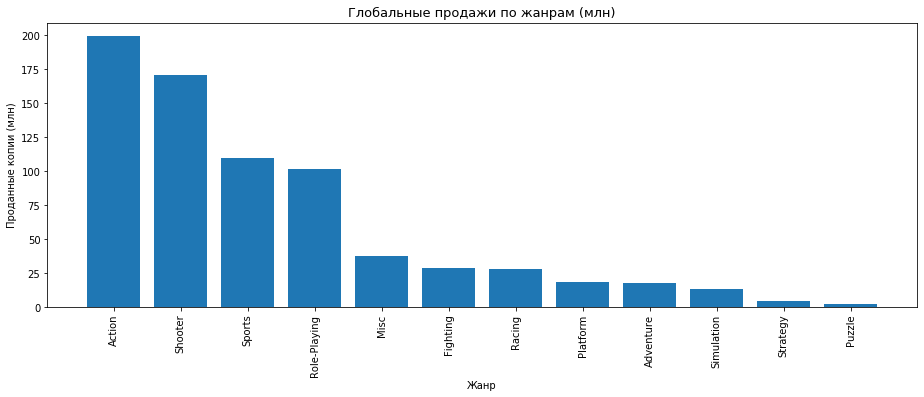

In [ ]:
x_1 = df.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(len(df['genre'].value_counts())).index.to_list()
y_1 = df.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)['total_sales'].head(len(df['genre'].value_counts())).to_list()

fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,1,1)

ax1.title.set_text('Глобальные продажи по жанрам (млн)')

ax1.title.set_color('black')

ax1.title.set_size(13)

ax1.set_xlabel('Жанр')
ax1.set_ylabel('Проданные копии (млн)')

fig.tight_layout()

ax1.bar(x_1, y_1)

plt.xticks(rotation=90)
plt.show()

- Первую позицию (с большим отрывом) по количеству проданных копий занимает жанр Action.
- Далее по популярности нос в нос идут два жанра: Sports и Shooter. 
- В третью по популярности группу можно выделить жанры Role-Playing и Misc
- Наименее популярные жанры из списка рассматриваемых: Strategy и Puzzle

In [ ]:
pivot = df.groupby('genre').agg({'total_sales':['count', 'sum','median']})
pivot = pivot.droplevel(0, axis=1)

In [ ]:
pivot.sort_values('median', ascending=False)

,count,sum,median
genre,,,
Shooter,128,170.940,0.515
Sports,161,109.480,0.180
Platform,38,18.090,0.140
Fighting,60,28.220,0.125
Role-Playing,222,101.700,0.110
Simulation,44,13.130,0.100
Misc,113,37.550,0.090
Action,619,199.360,0.090
Racing,69,27.520,0.090


Действительно видно, что количество игр в разных категориях очень сильно отличается, поэтому лучше посмотреть по медиане.

Обычно лучше продаются игры следующих жанров (топ-5): 
1. Shooter (0.515 - с огромным отрывом)
2. Sports (0.180)
3. Platform (0.140)
4. Fighting (0.125)
5. Role-Playing (0.110)

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

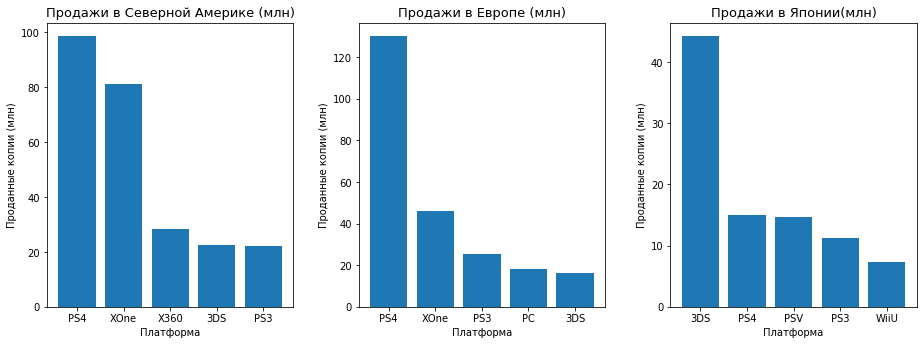

In [ ]:
x_1 = df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).index.to_list()
y_1 = df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)['na_sales'].head(5).to_list()

x_2 = df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).index.to_list()
y_2 = df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5).to_list()

x_3 = df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).index.to_list()
y_3 = df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5).to_list()

fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

ax1.title.set_text('Продажи в Cеверной Америке (млн)')
ax2.title.set_text('Продажи в Европе (млн)')
ax3.title.set_text('Продажи в Японии(млн)')

ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')

ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)

ax1.set_xlabel('Платформа')
ax1.set_ylabel('Проданные копии (млн)')
ax2.set_xlabel('Платформа')
ax2.set_ylabel('Проданные копии (млн)')
ax3.set_xlabel('Платформа')
ax3.set_ylabel('Проданные копии (млн)')

fig.tight_layout()

ax1.bar(x_1, y_1)
ax2.bar(x_2, y_2)
ax3.bar(x_3, y_3)

plt.show()

In [ ]:
print('Продажи в Cеверной Америке')
display(df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5))
print('Продажи в Европе')
display(df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5))
print('Продажи в Японии')
display(df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5))

Продажи в Cеверной Америке


,na_sales
platform,
PS4,98.610
XOne,81.270
X360,28.300
3DS,22.640
PS3,22.050


Продажи в Европе


,eu_sales
platform,
PS4,130.040
XOne,46.250
PS3,25.540
PC,17.970
3DS,16.120


Продажи в Японии


,jp_sales
platform,
3DS,44.240
PS4,15.020
PSV,14.610
PS3,11.220
WiiU,7.310


Можно заключить, что:
1. Такие платформы как PS4, PS3 и DS популярны во всех рассматриваемых регионах (что называется мировая слава!). 
2. В Северной Америке и Европе ключевую роль играют PS4 и XOne, тогда как в Японии из-за специфики рынка американская консоль вообще не представлена в топ-5.
3. Также из-за специфики японского рынка консоль 3DS, котрая в других рассматриваемых регионах закрывает списки топ-5 популярных платформ, в Японии занимает 1 позицию в рейтинге.

### Самые популярные жанры (топ-5)

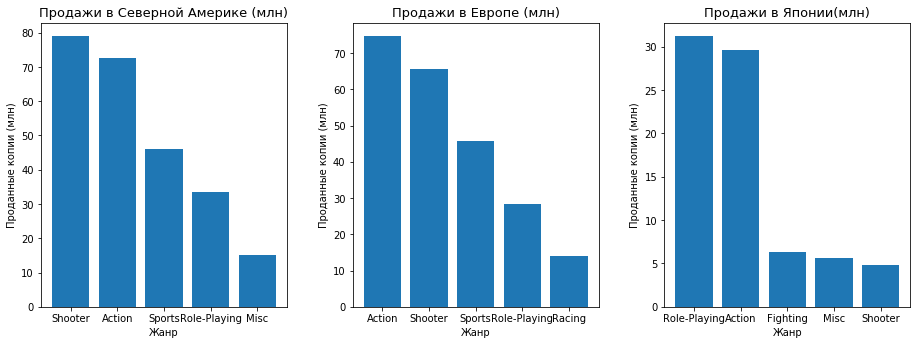

In [ ]:
x_1 = df.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).index.to_list()
y_1 = df.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)['na_sales'].head(5).to_list()

x_2 = df.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).index.to_list()
y_2 = df.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5).to_list()

x_3 = df.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).index.to_list()
y_3 = df.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5).to_list()

fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

ax1.title.set_text('Продажи в Cеверной Америке (млн)')
ax2.title.set_text('Продажи в Европе (млн)')
ax3.title.set_text('Продажи в Японии(млн)')

ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')

ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)

ax1.set_xlabel('Жанр')
ax1.set_ylabel('Проданные копии (млн)')
ax2.set_xlabel('Жанр')
ax2.set_ylabel('Проданные копии (млн)')
ax3.set_xlabel('Жанр')
ax3.set_ylabel('Проданные копии (млн)')

fig.tight_layout()

ax1.bar(x_1, y_1)
ax2.bar(x_2, y_2)
ax3.bar(x_3, y_3)

plt.show()

In [ ]:
print('Продажи в Cеверной Америке')
display(df.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5))
print('Продажи в Европе')
display(df.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5))
print('Продажи в Японии')
display(df.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5))

Продажи в Cеверной Америке


,na_sales
genre,
Shooter,79.020
Action,72.530
Sports,46.130
Role-Playing,33.580
Misc,15.050


Продажи в Европе


,eu_sales
genre,
Action,74.680
Shooter,65.520
Sports,45.730
Role-Playing,28.220
Racing,14.130


Продажи в Японии


,jp_sales
genre,
Role-Playing,31.230
Action,29.580
Fighting,6.370
Misc,5.610
Shooter,4.870


Можно заключить, что:

1. Наиболее популярными жанрами (по суммарным продажам) во всех рассматриваемых регионах являются: Action, Shooter, Sports и Misc.
2. В Японии опять же из-за специфики рынка первую позицию рейтинга занимает жанр Role-Playing, что неудивительно для родины таких игр, как Final Fantasy, Dragon Quest и Persona.

### Влияние рейтинга ESRB на продажи в регионах

In [ ]:
df['rating'].value_counts()

Not specified    749
T                272
M                265
E                219
E10+             185
K-A                0
EC                 0
AO                 0
Name: rating, dtype: int64

Для удобства интерпретации заменим аббревиатуры рейтингов на их описания. Подробнее про классификацию рейтингов Entertainment Software Rating Board можно почитать [здесь](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#%D0%9A%D1%80%D0%B0%D1%82%D0%BA%D0%B8%D0%B5_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F).

In [ ]:
new_rating_dict = {'T': 'От 13 лет', 'E': 'От 6 лет', 'M': 'От 17 лет', 'E10+': 'От 10 лет', 'Not specified': 'БР'}

In [ ]:
df['new_rating'] = df[df['rating'].notnull()]['rating'].map(new_rating_dict)

In [ ]:
df['new_rating'].value_counts()

БР           749
От 13 лет    272
От 17 лет    265
От 6 лет     219
От 10 лет    185
Name: new_rating, dtype: int64

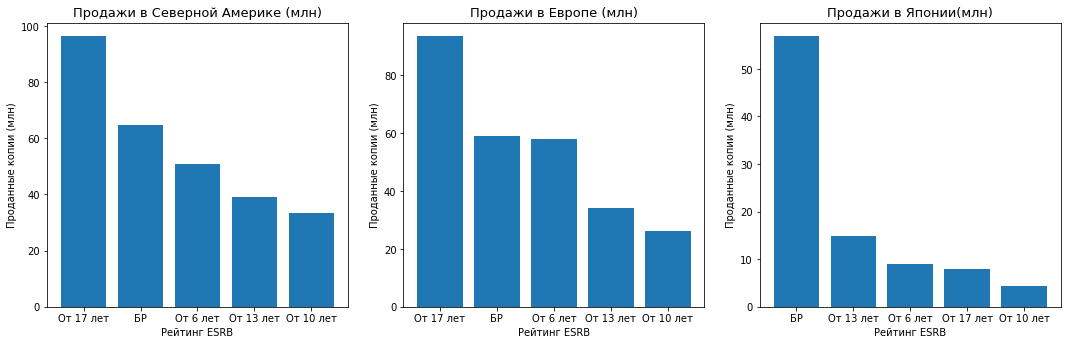

In [ ]:
x_1 = df.groupby('new_rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).index.to_list()
y_1 = df.groupby('new_rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)['na_sales'].head(5).to_list()

x_2 = df.groupby('new_rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).index.to_list()
y_2 = df.groupby('new_rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5).to_list()

x_3 = df.groupby('new_rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).index.to_list()
y_3 = df.groupby('new_rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5).to_list()

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

ax1.title.set_text('Продажи в Cеверной Америке (млн)')
ax2.title.set_text('Продажи в Европе (млн)')
ax3.title.set_text('Продажи в Японии(млн)')

ax1.title.set_color('black')
ax2.title.set_color('black')
ax3.title.set_color('black')

ax1.title.set_size(13)
ax2.title.set_size(13)
ax3.title.set_size(13)

ax1.set_xlabel('Рейтинг ESRB')
ax1.set_ylabel('Проданные копии (млн)')
ax2.set_xlabel('Рейтинг ESRB')
ax2.set_ylabel('Проданные копии (млн)')
ax3.set_xlabel('Рейтинг ESRB')
ax3.set_ylabel('Проданные копии (млн)')

fig.tight_layout()

ax1.bar(x_1, y_1)
ax2.bar(x_2, y_2)
ax3.bar(x_3, y_3)

plt.show()

In [ ]:
print('Продажи в Cеверной Америке')
display(df.groupby('new_rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5))
print('Продажи в Европе')
display(df.groupby('new_rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5))
print('Продажи в Японии')
display(df.groupby('new_rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5))

Продажи в Cеверной Америке


,na_sales
new_rating,
От 17 лет,96.420
БР,64.720
От 6 лет,50.740
От 13 лет,39.060
От 10 лет,33.230


Продажи в Европе


,eu_sales
new_rating,
От 17 лет,93.440
БР,58.950
От 6 лет,58.060
От 13 лет,34.120
От 10 лет,26.160


Продажи в Японии


,jp_sales
new_rating,
БР,56.900
От 13 лет,14.850
От 6 лет,8.940
От 17 лет,8.010
От 10 лет,4.460


Для Северной Америки и Европы картина выглядит приблизительно одинаково:

1. В Северной Америке и Европе наибольшая доля продаж приходится на игры от 17 лет и игры без рейтинга.
2. Наименьшая доля продаж во всех регионах приходится на игры категории "От 10 лет"
3. В Японии, в отличие от других рассматриваемых регионов, наибольшая доля продаж приходится на игры без рейтинга и игры с рейтингом от 13 лет.

## Проверка статистических гипотез

Необходимо проверить следующие статистические гиптезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Удаление выбросов

Напишем функцию, которая будет удалять экстримальные изначения из нашей выборки. Это нужно для того, чтобы выбросы не смазывали результаты применения тестов.

In [ ]:
def delete_outliers(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    return df.loc[iqr_test]

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

In [ ]:
alpha = 0.05

In [ ]:
xbox = df.query('platform == "XOne" and user_score != "-1"')
pc = df.query('platform == "PC" and user_score != "-1"')

In [ ]:
xbox = delete_outliers(xbox, 'user_score')
xbox = xbox['user_score']

pc = delete_outliers(pc, 'user_score')
pc = pc['user_score']

Одно из условий применения теста Стьюдента: дисперсии подгрупп долны быть однородными. Для этого применяется критерий Левена.

Если **(p Levene) > 0.05**, то дисперсии подгрупп гомогенны.

In [ ]:
platform_levene = st.levene(xbox, pc)

In [ ]:
print('p-значение:', platform_levene.pvalue)

if (platform_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 0.01125673819831583
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = средние по пользовательской оценке для игр платформ "XOne" и "PC" равны (нет отличий)

H1 =  средние по пользовательской оценке для игр платформ "XOne" и "PC" не равны (возможно есть отличия)

Так как мы показали, что дисперсии не равны, установим параметр equal_var=False

In [ ]:
results = st.ttest_ind(xbox, pc, equal_var=False)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть разница между платформами")
else:
    print("Не получилось отвергнуть нулевую гипотезу: возможно нет разницы между платформами")

p-значение: 0.06995363731477473
Не получилось отвергнуть нулевую гипотезу: возможно нет разницы между платформами


Судя по результатам теста, особой разницы в оценке пользователей по платформам "XOne" и "PC" определить не удалось. Но все равно предлагаю чуть внимательнее посмотреть на данные!

In [ ]:
df.query('(platform == "XOne" or platform == "PC") and user_score != "-1"').groupby('platform')\
  .agg({'user_score':['count','median','mean','var','std']})\
  .style.format("{:.2f}")

Да, медианные оценки отличаются лишь на 1 пункт, а средние практически равны.

**Не выявлено значимых отличий в пользовательских оценках игр между платформами PC и XOne**

### Средние пользовательские рейтинги жанров Action и Sports разные?

In [ ]:
action = df.query('genre == "Action" and user_score != "-1"')
sports = df.query('genre == "Sports" and user_score != "-1"')

In [ ]:
action = delete_outliers(action, 'user_score')
action = action['user_score']

sports = delete_outliers(sports, 'user_score')
sports = sports['user_score']

In [ ]:
genre_levene = st.levene(action, sports)

In [ ]:
print('p-значение:', genre_levene.pvalue)

if (genre_levene.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу: дисперсии возможно равны")

p-значение: 6.499275512486714e-15
Отвергаем нулевую гипотезу о равенстве дисперсий: дисперсии не равны


**Гипотеза о равенстве средних двух генеральных совокупностей (для независимых выборок):**

H0 = средние по пользовательской оценке для игр жанров "Action" и "Sports" равны (нет отличий)

H1 =  средние по пользовательской оценке для игр жанров "Action" и "Sports" не равны (возможно есть отличия)

Так как мы показали, что дисперсии неоднородны, установим параметр equal_var=False

In [ ]:
results = st.ttest_ind(action, sports, equal_var=False)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: есть разница между жанрами")
else:
    print("Не получилось отвергнуть нулевую гипотезу: возможно нет разницы между жанрами")

p-значение: 3.6282085687782744e-19
Отвергаем нулевую гипотезу: есть разница между жанрами


Разница не случайна, есть значимые различия между выборками, посмотрим на них подробнее!

In [ ]:
df.query('(genre == "Action" or genre == "Sports") and user_score != "-1"').groupby('genre')\
  .agg({'user_score':['count','median','mean','var','std']})\
  .style.format("{:.2f}")

**Выявлены значимые отличия в пользовательских оценках игр между жанрами Action и Sports: Пользовательские оценки для игр жанра Action в среднем выше, чем пользовательские оценки жанра Sports.**



## Общий вывод

**Основные выводы:**
1. Срок жизни игровой платформы оставляет в среднем **около 10 лет**;

2. Лидером продаж на 2016 год является приставка **PS4**, следом идут **XOne** и **3DS**. И на 4 месте **PC**. Следовательно для создания потенциально популярной игры **рекомендуется разрабатывать ее сразу для всех обозначенных платформ**. 

3. **PS4 и XOne можно назвать самыми успешными консолями**. Поэтому, если нет бюджета делать потенциально популярную игру сразу для всех платформ, можно сосредоточиться на платформах Sony и Microsoft.
4. **Наблюдается сильная положительаня связь между оценкой критиков и количеством продаж игр** (коэффициент корреляции Пирсона: 0.4019028771227368).Видно, что игры с более высокой оценкой критиков лучше продаются. В современном мире агенты влияния и разного рода тренд-сеттеры оказывают существенное влияние на популярность контента, на лояльность к нему. **Поэтому для обеспечения хороших продаж девелоперам обязательно нужно ориентироваться на оценки критиков, а отделу маркетинга трудиться не меньше, чем разработчикам**
5. С другой стороны, корреляция между продажами и оценкой пользователей сильно варьируются от одной платформы к другой. Корреляция может отсутствовать по следующим причинам: (а) успех игры определяется продажами на релизе, (б) на релизе пользователи чаще всего принимают решение о покупке исходя из различных факторов (собственных ожиданий,впечатлений от трейлеров, рекламной кампании и т.д.), (в) после покупки игрок уже сам ставит оценку игре, и иногда она может быть не самой высокой, но высокие продажи уже есть. Что также усиливает позицию относительно намерения **рекмендовать вкладывать бюджет в рекламу и маркетинг: выше Brand Lift - выше продажи на релизе**
6. По суммпе продаж: наиболее популярный жанр - Action. Далее по популярности нос в нос идут два жанра: Sports и Shooter. В третью по популярности группу можно выделить жанры Role-Playing и Misc. С другой стороны, обычно лучше продаются игры следующих жанров: Shooter (0.515 - с огромным отрывом), Sports (0.180), Platform (0.140), Fighting (0.125) и Role-Playing (0.110). Соответственно для создания потенциально популярной игры **следует делать ее в одном из обозначенных жанров: Shooter, Sports, Platform, Fighting или Role-Playing**.
7. Такие платформы как PS4, PS3 и DS популярны во всех рассматриваемых регионах. В Северной Америке и Европе ключевую роль играют PS4 и XOne, тогда как в Японии из-за специфики рынка американская консоль вообще не представлена в топ-5.Также из-за специфики японского рынка консоль 3DS, котрая в других рассматриваемых регионах закрывает списки топ-5 популярных платформ, в Японии занимает 1 позицию в рейтинге. Соответственно при **разработке стратегии следует учитывать специфику региональных рынков: при стратегии максимизации охвата стоит выпускать игру на одной из следующих платформ: актуальный Play Station или актуальный XBox. При ориентации на японский рынок рекомендуется также подумать о приставках от компании Nintendo**.
8. Наиболее популярными жанрами (по суммарным продажам) во всех рассматриваемых регионах являются: Action, Shooter, Sports и Misc. В Японии опять же из-за специфики рынка первую позицию рейтинга занимает жанр Role-Playing. Поэтому опять же при **разработке стратегии следует учитывать специфику региональных рынков: при стратегии максимизации охвата стоит разрабатывать игру в одном из жанров: Action, Shooter, Sports и Misc. При ориентации на японский рынок рекомендуется также подумать о разработке игры в жанре Role-Playing**
9. В Северной Америке и Европе наибольшая доля продаж приходится на игры от 17 лет и игры без рейтинга. Наименьшая доля продаж во всех регионах приходится на игры категории "От 10 лет". В Японии, в отличие от других рассматриваемых регионов, наибольшая доля продаж приходится на игры без рейтинга и игры с рейтингом от 13 лет.
10. **Не выявлено значимых отличий в пользовательских оценках игр между платформами PC и XOne**
11. **Выявлены значимые отличия в пользовательских оценках игр между жанрами Action и Sports: Пользовательские оценки для игр жанра Action в среднем выше, чем пользовательские оценки жанра Sports. Что еще раз подтверждает вывод о том, что стоит делать игру именно в жанре Action**.